In [2]:
from transplant.datasets.icentia11k import *
db_dir = 'data/icentia11k_subset'
out_dir = 'data/icentia11k_subset_unzipped'
patient_id = 0
signal, labels = load_patient_data(db_dir, patient_id)
out_signal_file = os.path.join(out_dir or os.path.curdir, '{:05d}_batched.npy'.format(patient_id))
out_labels_file = os.path.join(out_dir or os.path.curdir, '{:05d}_batched_lbls.npz'.format(patient_id))
np.save(out_signal_file, signal)


2024-02-23 15:27:33.342763: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


data/icentia11k_subset/00000_batched.pkl.gz


1.12.0
twindow is 40.96 with N 10240 and fsample 250.0


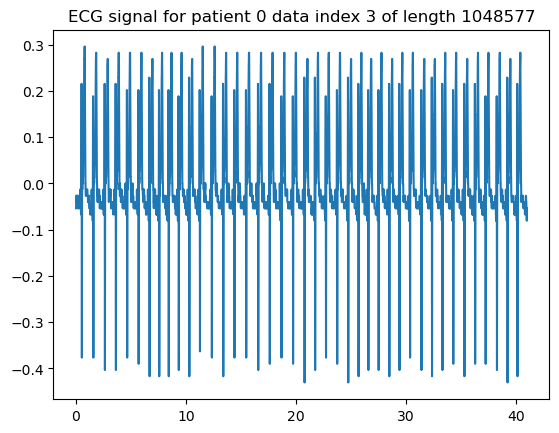

size of Sx is (201, 265)


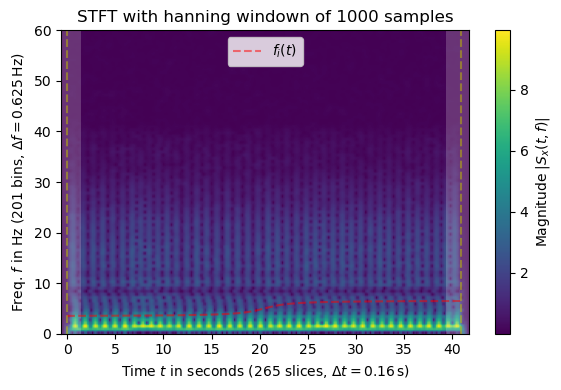

In [125]:
# lets inspect a patients data
from transplant.datasets.icentia11k import *
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as signal
from scipy.signal import ShortTimeFFT
import scipy as scipy

print(scipy.__version__)
patient_id = 0
# db_dir = 'data/icentia11k_subset'
# patient_data = load_patient_data(db_dir, patient_id, unzipped=False)
db_dir = 'data/icentia11k_subset_unzipped'
(ecg_signal, labels) = load_patient_data(db_dir, patient_id, include_labels=True, unzipped=True)

# lets select a portion of the signal
data_idx = 3;
fsample = 250.0;
T_x = 1.0/fsample
window_size = 400
stride=40
output_size = 256
N = stride*output_size # adjust stride/output_size/window size so this is approximately 100*250
twindow = N/fsample
print(f"twindow is {twindow} with N {N} and fsample {fsample}")
t_x = np.arange(N) * T_x 
selected_signal =ecg_signal[data_idx][:N];
# lets plot signal


plt.plot(t_x, selected_signal)
# print title with info on length
title = f"ECG signal for patient {patient_id} data index {data_idx} of length {len(ecg_signal[data_idx])}"
plt.title(title)
plt.show()

# lets compute an short time fft  (spectogram) with  window of n = 1000
# sampling frequency is 250Hz

f_i = 1 * np.arctan((t_x - t_x[N // 2]) / 2) + 5  # varying frequency
w = np.hanning(window_size)
# g_std = 8  # standard deviation for Gaussian window in samples
# w = signal.windows.gaussian(window_size, std=g_std, sym=True)  # symmetric Gaussian window

SFT = ShortTimeFFT(w, hop=stride, fs=1/T_x);
Sx = SFT.stft(selected_signal)
# print length of Sx for debug
print(f"size of Sx is {Sx.shape}")
# print(f"Length of Sx is {len(Sx)} and type is {type(Sx)}")

fig1, ax1 = plt.subplots(figsize=(6., 4.))  # enlarge plot a bit
t_lo, t_hi = SFT.extent(N)[:2]  # time range of plot
ax1.set_title(rf"STFT with hanning windown of {n} samples")
ax1.set(xlabel=f"Time $t$ in seconds ({SFT.p_num(N)} slices, " +
               rf"$\Delta t = {SFT.delta_t:g}\,$s)",
        ylabel=f"Freq. $f$ in Hz ({SFT.f_pts} bins, " +
               rf"$\Delta f = {SFT.delta_f:g}\,$Hz)",
        xlim=(t_lo, t_hi))

im1 = ax1.imshow(abs(Sx), origin='lower', aspect='auto',
                 extent=SFT.extent(N), cmap='viridis')
ax1.plot(t_x, f_i, 'r--', alpha=.5, label='$f_i(t)$')
fig1.colorbar(im1, label="Magnitude $|S_x(t, f)|$")

# Shade areas where window slices stick out to the side:
for t0_, t1_ in [(t_lo, SFT.lower_border_end[0] * SFT.T),
                 (SFT.upper_border_begin(N)[0] * SFT.T, t_hi)]:
    ax1.axvspan(t0_, t1_, color='w', linewidth=0, alpha=.2)
for t_ in [0, N * SFT.T]:  # mark signal borders with vertical line:
    ax1.axvline(t_, color='y', linestyle='--', alpha=0.5)
ax1.legend()
fig1.tight_layout()

# zoom into 0 to 10 on y axis
ax1.set_ylim(0, 60)
plt.show()







In [24]:
# lets print things to discover what is in label. it is a dictionary
for key, val in labels.items():
    print(len(labels[key]))
    print(type(labels[key]))
    # loop thorugh elemenets of labels[key] to check size
    for i in range(len(labels[key])):
        print(len(labels[key][i][0]))
        # print(np.asanyarray(labels[key][i]))
    print(len(labels[key][0]))
    print(np.asanyarray(labels[key]))

np.savez(out_labels_file, **labels)





50
<class 'list'>
6885
6768
5328
4443
4432
4682
4879
4796
4876
6275
5802
6371
4862
4900
4872
4811
5395
6062
6033
7049
7084
6463
4821
4857
6322
5916
6053
6016
6276
4992
4800
4755
5104
6046
5110
4681
5230
6601
5664
6821
6142
5910
5912
6586
6322
5696
5814
5291
4607
7299
2


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (50, 2) + inhomogeneous part.

In [23]:

# for each label key, print the label and the type/size of the value
for key in labels:
    # for size, convert to numpy then printthe size
    # print(key)
    print(type(labels[key]))
    print(labels[key])
np.savez(out_labels_file, **labels)



<class 'list'>
[[array([     28,     190,     354, ..., 1048154, 1048299, 1048448],
      dtype=int32), array([1, 1, 1, ..., 1, 1, 1])], [array([     25,     173,     321, ..., 1048142, 1048289, 1048438],
      dtype=int32), array([1, 1, 1, ..., 1, 1, 1])], [array([     42,     241,     435, ..., 1048035, 1048262, 1048489],
      dtype=int32), array([1, 1, 1, ..., 1, 1, 1])], [array([    132,     393,     656, ..., 1047996, 1048230, 1048498],
      dtype=int32), array([1, 1, 1, ..., 1, 1, 1])], [array([    199,     438,     679, ..., 1047978, 1048187, 1048392],
      dtype=int32), array([1, 1, 1, ..., 1, 1, 1])], [array([     19,     224,     428, ..., 1047840, 1048086, 1048336],
      dtype=int32), array([1, 1, 1, ..., 1, 1, 1])], [array([      5,     246,     489, ..., 1047957, 1048164, 1048375],
      dtype=int32), array([1, 1, 1, ..., 1, 1, 1])], [array([     18,     242,     456, ..., 1048119, 1048333, 1048556],
      dtype=int32), array([1, 1, 1, ..., 1, 1, 1])], [array([    207,

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (50, 2) + inhomogeneous part.